### we'll cover:

Data loading and preprocessing

Exploratory data analysis (EDA)

Frequent itemset mining (Apriori)

Association rules generation

Filtering strong rules

Visualization

Exporting rules

And finally, a simple interactive dashboard (using plotly and ipywidgets)



### Step 1: Load and preprocess groceries.csv

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Load transactions from file
with open("C:/Users/yadav/Documents/Projects/ML-Algorithms-Tutorial/datasets/association/groceries.csv") as file:
    transactions = [line.strip().split(',') for line in file]

print(f"Number of transactions: {len(transactions)}")
print("Sample transaction:", transactions[0])

# One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

df_encoded.head()


Number of transactions: 9835
Sample transaction: ['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### Step 2: Exploratory Data Analysis (EDA)

whole milk               0.255516
other vegetables         0.193493
rolls/buns               0.183935
soda                     0.174377
yogurt                   0.139502
bottled water            0.110524
root vegetables          0.108998
tropical fruit           0.104931
shopping bags            0.098526
sausage                  0.093950
pastry                   0.088968
citrus fruit             0.082766
bottled beer             0.080529
newspapers               0.079817
canned beer              0.077682
pip fruit                0.075648
fruit/vegetable juice    0.072293
whipped/sour cream       0.071683
brown bread              0.064870
domestic eggs            0.063447
dtype: float64


C:\Users\yadav\AppData\Local\Temp\ipykernel_5776\939280840.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_support.head(20).values, y=item_support.head(20).index, palette="viridis")


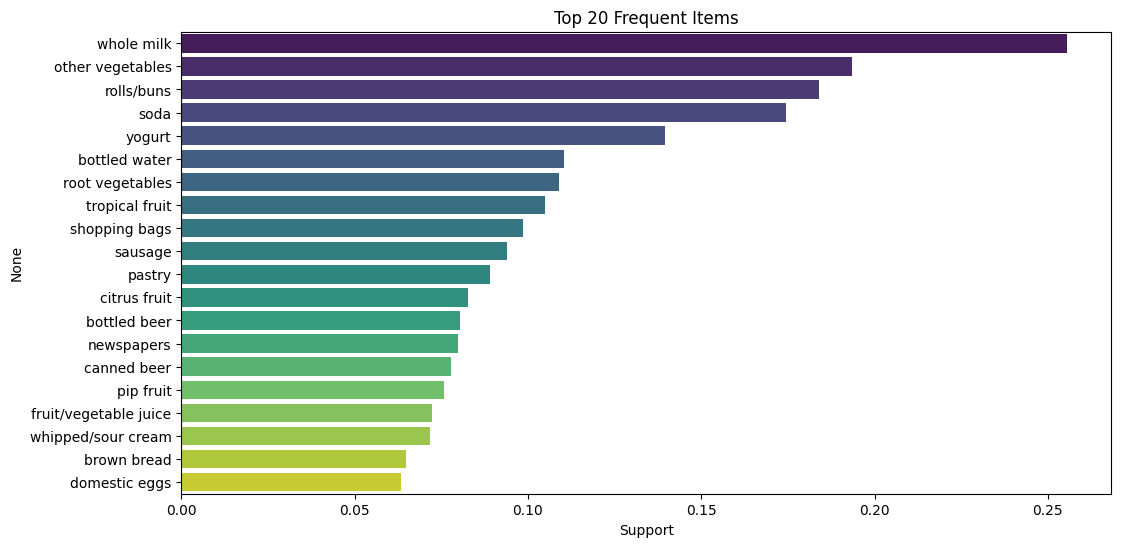

In [2]:
# Top 20 most frequent items
item_support = df_encoded.mean().sort_values(ascending=False)
print(item_support.head(20))

# Plot top 20 items
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=item_support.head(20).values, y=item_support.head(20).index, palette="viridis")
plt.xlabel("Support")
plt.title("Top 20 Frequent Items")
plt.show()


### Step 3: Frequent Itemset Mining with Apriori

In [3]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
print(f"Number of frequent itemsets found: {len(frequent_itemsets)}")

frequent_itemsets.sort_values(by='support', ascending=False).head(10)


Number of frequent itemsets found: 122


,support,itemsets
57,0.255516,(whole milk)
39,0.193493,(other vegetables)
43,0.183935,(rolls/buns)
49,0.174377,(soda)
58,0.139502,(yogurt)
5,0.110524,(bottled water)
44,0.108998,(root vegetables)
53,0.104931,(tropical fruit)
47,0.098526,(shopping bags)
46,0.093950,(sausage)


### Step 4: Generate Association Rules

In [4]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Convert frozensets to strings
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

print(f"Number of rules generated: {len(rules)}")
rules.head(10)


Number of rules generated: 126


,antecedents,consequents,support,confidence,lift
0,whole milk,beef,0.021251,0.083168,1.585180
1,beef,whole milk,0.021251,0.405039,1.585180
2,other vegetables,bottled water,0.024809,0.128219,1.160101
3,bottled water,other vegetables,0.024809,0.224471,1.160101
4,bottled water,rolls/buns,0.024199,0.218951,1.190373
5,rolls/buns,bottled water,0.024199,0.131564,1.190373
6,soda,bottled water,0.028978,0.166181,1.503577
7,bottled water,soda,0.028978,0.262190,1.503577
8,whole milk,bottled water,0.034367,0.134501,1.216940
9,bottled water,whole milk,0.034367,0.310948,1.216940


### Step 5: Filter Strong Rules

In [5]:
strong_rules = rules[(rules['confidence'] > 0.3) & (rules['lift'] > 1.5)]
print(f"Number of strong rules: {len(strong_rules)}")
strong_rules.head(10)


Number of strong rules: 29


,antecedents,consequents,support,confidence,lift
1,beef,whole milk,0.021251,0.405039,1.585180
12,brown bread,whole milk,0.025216,0.388715,1.521293
15,butter,other vegetables,0.020031,0.361468,1.868122
16,butter,whole milk,0.027555,0.497248,1.946053
19,citrus fruit,other vegetables,0.028876,0.348894,1.803140
25,curd,whole milk,0.026131,0.490458,1.919481
27,domestic eggs,other vegetables,0.022267,0.350962,1.813824
29,domestic eggs,whole milk,0.029995,0.472756,1.850203
32,frozen vegetables,whole milk,0.020437,0.424947,1.663094
38,margarine,whole milk,0.024199,0.413194,1.617098


### Step 6: Visualization of Rules

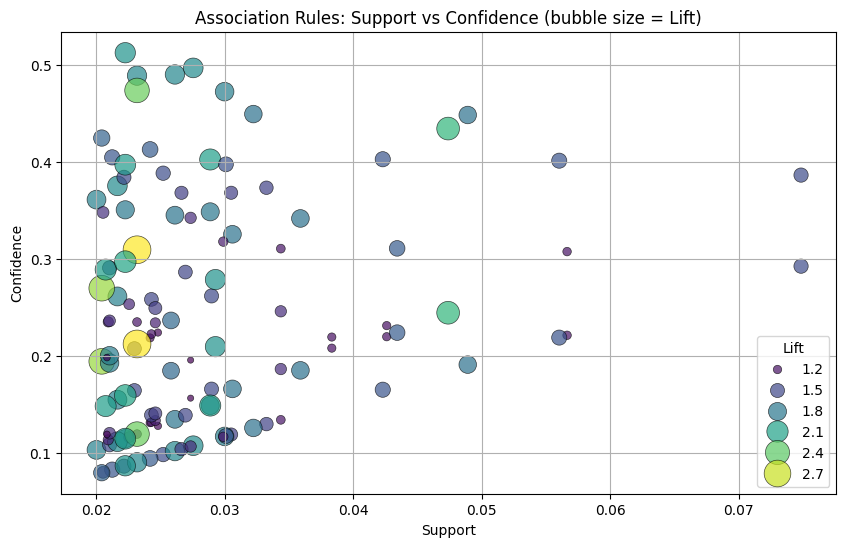

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rules,
    x='support',
    y='confidence',
    size='lift',
    hue='lift',
    palette='viridis',
    sizes=(20, 400),
    alpha=0.7,
    edgecolor='k'
)
plt.title('Association Rules: Support vs Confidence (bubble size = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.grid(True)
plt.show()


### Step 8: Simple Interactive Dashboard (optional but powerful!)

In [7]:
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px

# Dropdown for filtering by minimum confidence
conf_slider = widgets.FloatSlider(value=0.3, min=0.0, max=1.0, step=0.05, description='Min Confidence:')
lift_slider = widgets.FloatSlider(value=1.5, min=0.5, max=5.0, step=0.1, description='Min Lift:')

def filter_rules(min_confidence, min_lift):
    filtered = rules[(rules['confidence'] >= min_confidence) & (rules['lift'] >= min_lift)]
    if filtered.empty:
        print("No rules found for the selected thresholds.")
        return
    fig = px.scatter(filtered, x='support', y='confidence', size='lift', color='lift',
                     hover_data=['antecedents', 'consequents'],
                     title='Filtered Association Rules')
    fig.show()

ui = widgets.VBox([conf_slider, lift_slider])
out = widgets.interactive_output(filter_rules, {'min_confidence': conf_slider, 'min_lift': lift_slider})

display(ui, out)


Output()